In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
healthcare_header = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
healthcare = pd.read_csv('healthcare-dataset-stroke-data\healthcare-dataset-stroke-data.csv', sep=',', names=healthcare_header, 
                     usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], encoding="ISO-8859-1", low_memory=False, header=0)

In [3]:
print("\n************ Data Analysis ************\n")

print("The characteristics in our dataset are:\n")
for col in healthcare.columns:
    print(col)
# Alternatively:
# print(healthcare.columns)    
print(f"\nSpecifically, there are {len(healthcare.id.unique())} unique ids in the data, of {len(healthcare.age.unique())} different ages.\n")

print("Regarding the possible values of the characteristics, those are:\n")
print(f"Genders: {(healthcare.gender.unique())}")
print(f"Work types: {(healthcare.work_type.unique())}")
print(f"Resident types: {(healthcare.Residence_type.unique())}")
print(f"Smoking statuses: {(healthcare.smoking_status.unique())}")
print(f"BMI range: {min(healthcare.bmi.unique())} - {max(healthcare.bmi.unique())}")
print(f"Average glucose levels range: {min(healthcare.avg_glucose_level.unique())} - {max(healthcare.avg_glucose_level.unique())}\n")
print("(The rest of the characteristics have binary values)\n\nSummary Statistics:\n")
# Summary statistics
print(healthcare.describe(), "\n")


************ Data Analysis ************

The characteristics in our dataset are:

id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke

Specifically, there are 5110 unique ids in the data, of 104 different ages.

Regarding the possible values of the characteristics, those are:

Genders: ['Male' 'Female' 'Other']
Work types: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Resident types: ['Urban' 'Rural']
Smoking statuses: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
BMI range: 10.3 - 97.6
Average glucose levels range: 55.12 - 271.74

(The rest of the characteristics have binary values)

Summary Statistics:

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.08

In [4]:
# Count gender instances
print("Gender Distribution:\n")
print(healthcare['gender'].value_counts(), "\n")
# Output mean and median age 
print("Mean age of the dataset: {}".format(healthcare['age'].mean()))
print("Median age of the dataset: {}".format(healthcare['age'].median()), "\n")
# Output the top 10 ages present in the dataset
print("Most common ages (with instances):\n")
print(healthcare['age'].value_counts().head(10), "\n")

Gender Distribution:

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

Mean age of the dataset: 43.226614481409015
Median age of the dataset: 45.0 

Most common ages (with instances):

78.0    102
57.0     95
52.0     90
54.0     87
51.0     86
79.0     85
53.0     85
45.0     85
50.0     83
55.0     83
Name: age, dtype: int64 



In [5]:
print("Stroke frequency for all the patients:")
print(healthcare['stroke'].value_counts(), "\n")

test_healthcare = healthcare.copy()
test_healthcare.drop(columns=['hypertension','age','id','gender','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'], inplace=True)
strokers = test_healthcare[test_healthcare['stroke']==1]
non_strokers = test_healthcare[test_healthcare['stroke']==0]
strokers = pd.DataFrame(strokers)
non_strokers = pd.DataFrame(non_strokers)
print("*** Correlation between smoking and strokes ***\n\nPeople who had a stroke:")
print(strokers['smoking_status'].value_counts(),"\n")
print("People who hadn't a stroke:")
print(non_strokers['smoking_status'].value_counts(),"\n")

Stroke frequency for all the patients:
0    4861
1     249
Name: stroke, dtype: int64 

*** Correlation between smoking and strokes ***

People who had a stroke:
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64 

People who hadn't a stroke:
never smoked       1802
Unknown            1497
formerly smoked     815
smokes              747
Name: smoking_status, dtype: int64 



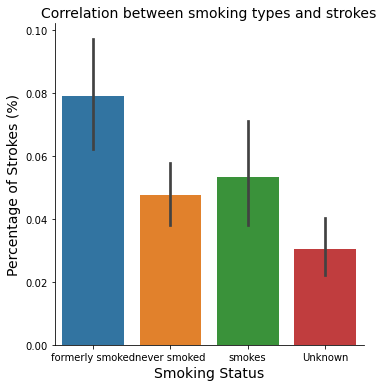

In [6]:
all_boyz = [strokers, non_strokers]
good_data = pd.concat(all_boyz)
sns.catplot(x="smoking_status", y="stroke", kind="bar",data=good_data)

plt.title('Correlation between smoking types and strokes', fontsize=14)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Percentage of Strokes (%)', fontsize=14)
plt.show()

In [7]:
better_healthcare = healthcare.copy()
better_healthcare['age'] = better_healthcare['age'].round(-1)
better_healthcare['avg_glucose_level'] = better_healthcare['avg_glucose_level'].round(-1)
better_healthcare['bmi'] = better_healthcare['bmi'].round(-1)
better_healthcare.to_csv("better_dataset.csv")

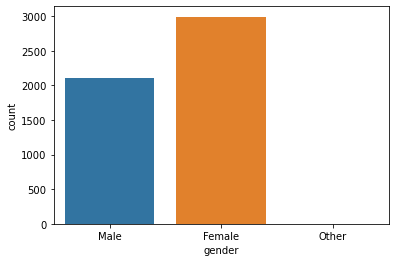

In [8]:
sns.countplot(better_healthcare['gender'])
plt.show()

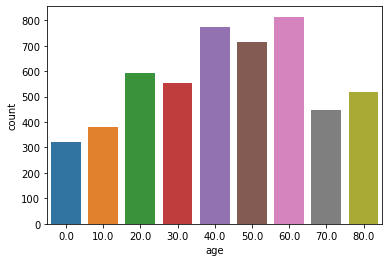

In [9]:
sns.countplot(better_healthcare['age'])
plt.show()

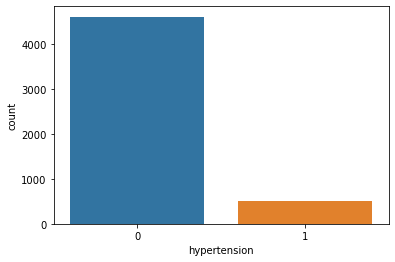

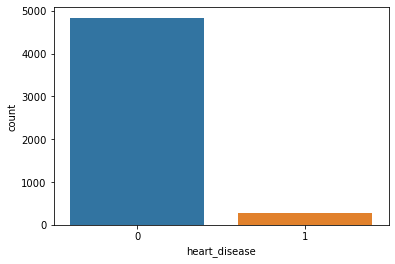

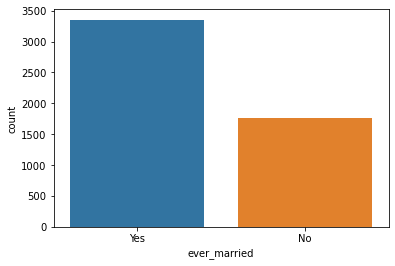

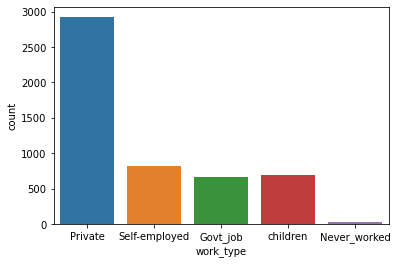

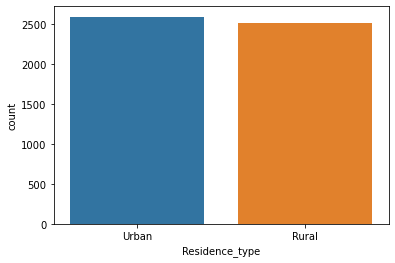

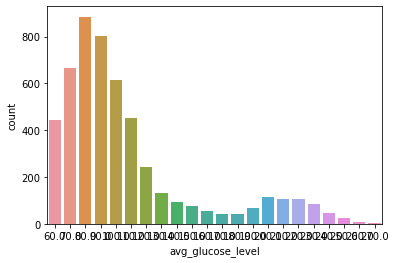

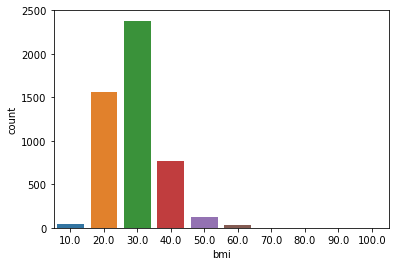

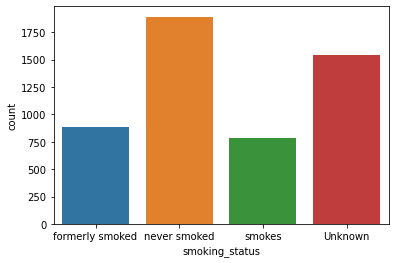

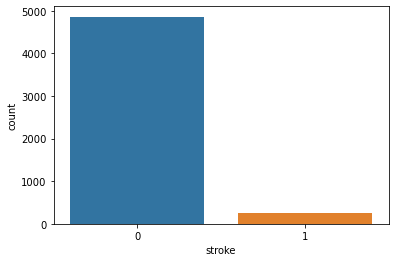

In [10]:
sns.countplot(better_healthcare['hypertension'])
plt.show()
sns.countplot(better_healthcare['heart_disease'])
plt.show()
sns.countplot(better_healthcare['ever_married'])
plt.show()
sns.countplot(better_healthcare['work_type'])
plt.show()
sns.countplot(better_healthcare['Residence_type'])
plt.show()
sns.countplot(better_healthcare['avg_glucose_level'])
plt.show()
sns.countplot(better_healthcare['bmi'])
plt.show()
sns.countplot(better_healthcare['smoking_status'])
plt.show()
sns.countplot(better_healthcare['stroke'])
plt.show()